# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/t6/31wjn43n6nqbfp3pnnr60y_m0000gn/T/ipykernel_52070/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/t6/31wjn43n6nqbfp3pnnr60y_m0000gn/T/ipykernel_52070/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [12]:
len(y_train)

389003

In [13]:
sum((y_train==1))

1519

# 3.) Train three logistic regression models

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [16]:
over_log.score(X_test, y_test)

0.9198877132368819

In [17]:
under_log.score(X_test, y_test)

0.9185801002903141

In [18]:
smote_log.score(X_test, y_test)

0.9171765157513376

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

In [19]:
X_train

array([[-0.28874049, -0.27766037,  1.12803178, ..., -0.28537353,
        -0.31408912, -0.18002167],
       [-0.41643094, -0.28434595,  1.18583201, ..., -0.28537353,
         3.18380978, -0.18002167],
       [-0.41307708,  0.01482966,  1.12803178, ..., -0.28537353,
        -0.31408912, -0.18002167],
       ...,
       [-0.31721778, -0.2870629 ,  1.47483317, ..., -0.28537353,
        -0.31408912, -0.18002167],
       [-0.37563585, -0.29278387,  0.02982736, ...,  3.50417925,
        -0.31408912, -0.18002167],
       [ 0.08804999, -0.29250349, -1.18397751, ..., -0.28537353,
        -0.31408912, -0.18002167]])

# 5.) Which performed best in Out of Sample metrics?

In [20]:
# Sensitivity here in credit fraud is more important as seen from last class

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_true = y_test

In [23]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76443,  6616],
       [   62,   237]])

In [24]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7926421404682275


In [25]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76332,  6727],
       [   60,   239]])

In [26]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7993311036789298


In [27]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76217,  6842],
       [   62,   237]])

In [28]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7926421404682275


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [29]:
df = pd.read_csv("fraudTest.csv")

df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)


/var/folders/t6/31wjn43n6nqbfp3pnnr60y_m0000gn/T/ipykernel_52070/3693433200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/t6/31wjn43n6nqbfp3pnnr60y_m0000gn/T/ipykernel_52070/3693433200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [30]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis =1)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

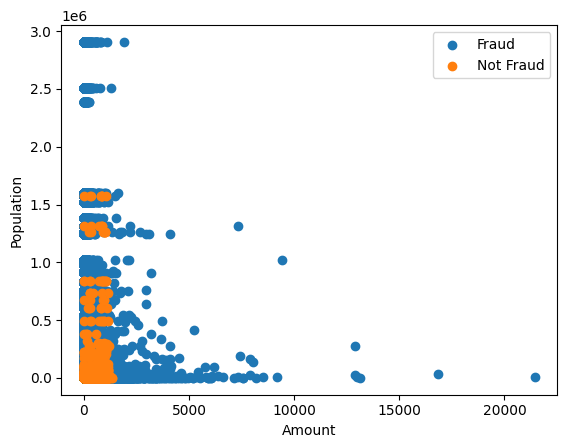

In [33]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [34]:

raw_temp_2 = pd.concat([pd.DataFrame(smote_X), pd.DataFrame(smote_y)], axis =1)


In [35]:
df = pd.read_csv("fraudTest.csv")

df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)


/var/folders/t6/31wjn43n6nqbfp3pnnr60y_m0000gn/T/ipykernel_52070/3693433200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/t6/31wjn43n6nqbfp3pnnr60y_m0000gn/T/ipykernel_52070/3693433200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [36]:
# plt.scatter(raw_temp_2[raw_temp_2["is_fraud"] == 0]["amt"], raw_temp_2[raw_temp_2["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp_2[raw_temp_2["is_fraud"] == 1]["amt"], raw_temp_2[raw_temp_2["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

KeyError: 'amt'

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [46]:
def evaluate_model(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Recall is the same as sensitivity
    f1 = f1_score(y_true, y_pred)
    return sensitivity, specificity, precision, recall, f1

In [49]:
#3つのモデル、3つのサンプル方法
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Logistic Regression Lasso': LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    'Decision Trees': DecisionTreeClassifier()
}

# Define the sampling techniques
sampling_techniques = {
    'Oversampling': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# DataFrame to store the performance metrics
metrics = ['Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score']
index = pd.MultiIndex.from_product([models.keys(), sampling_techniques.keys()], names=['Model', 'Sampling Technique'])
df_performance = pd.DataFrame(index=index, columns=metrics)

# Loop through each model and sampling technique, train, and evaluate
for model_name, model in models.items():
    for technique_name, technique in sampling_techniques.items():
        # Apply sampling technique
        X_resampled, y_resampled = technique.fit_resample(X_train, y_train)
        
        # Train the model
        model.fit(X_resampled, y_resampled)
        
        # Make predictions on the test set
        y_pred = model.predict(X_holdout)
        
        # Evaluate the model
        sensitivity, specificity, precision, recall, f1 = evaluate_model(y_holdout, y_pred)
        
        # Store the performance metrics
        df_performance.loc[(model_name, technique_name), :] = sensitivity, specificity, precision, recall, f1

# Display the performance DataFrame
print(df_performance)

/Users/ryotaromatsubara/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ryotaromatsubara/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

                                             Sensitivity Specificity  \
Model                     Sampling Technique                           
Logistic Regression       Oversampling          0.752266    0.911294   
                          Undersampling         0.761329    0.877245   
                          SMOTE                 0.749245    0.976128   
Logistic Regression Lasso Oversampling          0.755287     0.90373   
                          Undersampling         0.761329    0.870331   
                          SMOTE                 0.734139    0.977754   
Decision Trees            Oversampling          0.543807    0.998555   
                          Undersampling         0.957704    0.945656   
                          SMOTE                 0.679758    0.997314   

                                             Precision    Recall  F1 Score  
Model                     Sampling Technique                                
Logistic Regression       Oversampling        0.03270

Sensitivity (Recall): Decision Trees with undersampling show high sensitivity (0.958), significantly outperforming other model-sampling combinations. High sensitivity is crucial when the cost of false negatives is high.

Specificity: Decision Trees with Oversampling and SMOTE exhibit the highest specificity (0.998 and 0.997), indicating their strength in correctly identifying negatives. 

Precision: The Decision Tree with Oversampling shows the highest precision (0.600), meaning it has a lower false positive rate. Similarly, the Decision Tree with SMOTE also shows high precision (0.502).

F1 Score: The F1 Score balances precision and recall, and the Decision Tree with SMOTE has the highest F1 score (0.578), indicating a balanced performance between precision and recall.The F1 score for Oversampling is the second highest (0.571).

Given these results, I consider the Decision Tree with SMOTE to be the best model. The Decision Tree with SMOTE and the Decision Tree with Oversampling both show nearly the same level of high F1 scores, making either a candidate for the best model, but they differ in the balance of Precision and Recall. That is, the Decision Tree with Oversampling has relatively higher precision, and the Decision Tree with SMOTE has relatively higher sensitivity. Considering this model is for detecting credit card fraud, where the cost of false negatives is significant, the higher sensitivity of the Decision Tree with SMOTE is deemed better.